In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv175_6964.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv905_29114.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv478_14309.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv872_12591.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv631_4967.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv855_20661.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv380_7574.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv740_12445.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv004_11636.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv439_15970.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv768_11751.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv902_12256.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv533_9821.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/cv619_12462.txt
/kaggle/input/movie-review-dataset/txt_sentoken/pos/

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re 
import nltk
from nltk.corpus import stopwords
import pickle
from nltk.corpus import wordnet
from wordcloud import WordCloud 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
import subprocess

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping,ModelCheckpoint,LearningRateScheduler

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

True

In [3]:
def read_files(path):
    movie_data=load_files(path)
    X,Y=movie_data.data,movie_data.target
    return X,Y

In [4]:
path='/kaggle/input/movie-review-dataset/txt_sentoken'
X,Y=read_files(path)

In [5]:
print('show sampile of data \n\n',X[0])

print('show X linght \n',len(X))

print('show Y linght \n',len(Y))

print('data type of X and Y : ', type(X)," , ",type(Y))

show sampile of data 

 b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogm

In [6]:
df=pd.DataFrame(list(zip(X,Y)),columns=['Text','label'])

In [7]:
df.head()

,Text,label
0,"b""arnold schwarzenegger has been an icon for a...",0
1,"b""good films are hard to find these days . \ng...",1
2,"b""quaid stars as a man who has taken up the pr...",1
3,b'we could paraphrase michelle pfieffer\'s cha...,0
4,"b""kolya is one of the richest films i've seen ...",1


In [8]:
df.describe()

,label
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.label.value_counts()

label
0    1000
1    1000
Name: count, dtype: int64

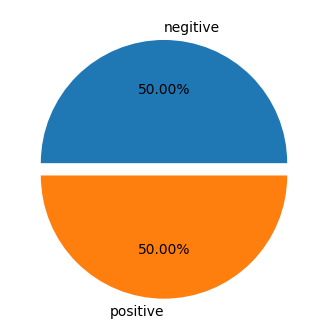

In [12]:
val_name={1:"positive",
          0:'negitive'
    
}
plt.figure(figsize=(4,4))
value=df.label.value_counts()
plt.pie(value, labels=df.label.map(val_name).unique(), autopct='%1.2f%%',startangle=0,explode=(0,0.1))
plt.show()

In [13]:
wordnet = WordNetLemmatizer()

In [14]:
df.Text=df.Text.str.decode("utf-8")

In [15]:
df.head()

,Text,label
0,arnold schwarzenegger has been an icon for act...,0
1,good films are hard to find these days . \ngre...,1
2,quaid stars as a man who has taken up the prof...,1
3,we could paraphrase michelle pfieffer's charac...,0
4,kolya is one of the richest films i've seen in...,1


In [16]:
import string
punctuations = string.punctuation
def preprocess_text(text):
    
    var = re.sub("[^a-zA-Z0-9]", " ", text)
    var = re.sub(r'^b\s+', '', text)
    var=var.lower()
    var=var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))and word not in punctuations ]
    var=' '.join(var)
    return var

In [17]:
print(df.Text[0])
print('*'*20)
preprocess_text(df.Text[0])

arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is that wea

"arnold schwarzenegger icon action enthusiast since late 80's lately film sloppy one-liner getting worse hard seeing arnold mr freeze batman robin especially say ton ice joke hey got 15 million what's matter arnold signed another expensive blockbuster can't compare like terminator series true lie even eraser called dark thriller devil gabriel byrne come upon earth impregnate woman robin tunney happens every 1000 year basically destroy world apparently god chosen one man one man jericho cane arnold help trusty sidekick kevin pollack stop nothing let devil take world part actually absurd would fit right dogma yes film weak better blockbuster right sleepy hollow make world enough look like 4 star film anyway definitely seem like arnold movie type film see sure gave u chuckle well known one-liner seemed confused character film going understandable especially ending changed according source aside form still walked much like past film i'm sorry say arnold maybe end action day speaking action

In [18]:
df['processed_text']=df.Text.apply(preprocess_text)

In [19]:
df.head()

,Text,label,processed_text
0,arnold schwarzenegger has been an icon for act...,0,arnold schwarzenegger icon action enthusiast s...
1,good films are hard to find these days . \ngre...,1,good film hard find day great film beyond rare...
2,quaid stars as a man who has taken up the prof...,1,quaid star man taken proffesion dragonslayer f...
3,we could paraphrase michelle pfieffer's charac...,0,could paraphrase michelle pfieffer's character...
4,kolya is one of the richest films i've seen in...,1,kolya one richest film i've seen time zdenek s...


In [20]:
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white')

In [21]:
range(len(df['label'].unique()))

range(0, 2)

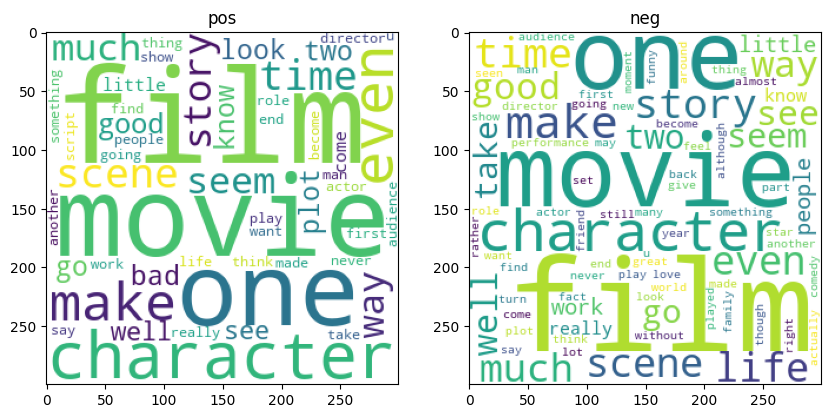

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,12))
dic={0:'pos',1:'neg'}
for i in range(len(df['label'].unique())):
    ax = axs[i%2]
    cloud = wc.generate(df[df['label'] == i]['processed_text'].str.cat(sep=" "))
    ax.imshow(cloud)
    ax.set_title(dic[i])

plt.show()

In [23]:
df['num_characters'] = df.Text.apply(len)
df['num_words'] = df.Text.apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df.Text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Text,label,processed_text,num_characters,num_words,num_sentences
0,arnold schwarzenegger has been an icon for act...,0,arnold schwarzenegger icon action enthusiast s...,3126,644,32
1,good films are hard to find these days . \ngre...,1,good film hard find day great film beyond rare...,3291,614,23
2,quaid stars as a man who has taken up the prof...,1,quaid star man taken proffesion dragonslayer f...,1732,359,16
3,we could paraphrase michelle pfieffer's charac...,0,could paraphrase michelle pfieffer's character...,2177,421,29
4,kolya is one of the richest films i've seen in...,1,kolya one richest film i've seen time zdenek s...,727,147,5


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


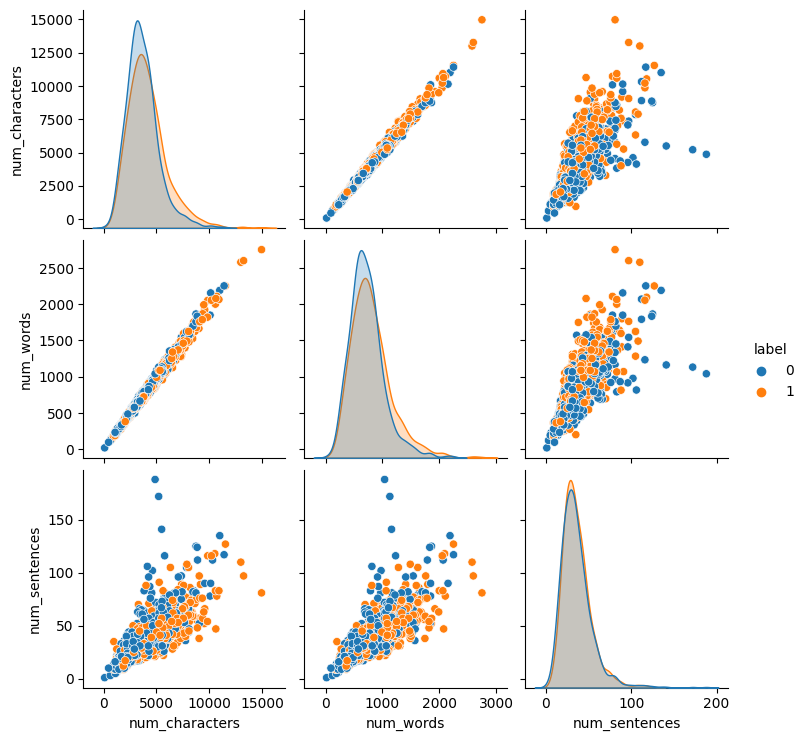

In [25]:
sns.pairplot(data=df,hue='label')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [27]:
X = tfidf.fit_transform(df['processed_text']).toarray()
X.shape

(2000, 3000)

In [28]:
y = df['label'].values
y.shape

(2000,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
svc = SVC(kernel='sigmoid', gamma=1.0)

In [32]:
clfs = {
    'gnb':gnb,
    'mnb':mnb,
    'bnb':bnb,
    'lg':lg,
    'svc':svc,
    'rf':rf
}

In [33]:
def train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test):
    acc = []
    prec = []
    conf_mat = []
    classification_rep = []

    for clf in clfs:
        model = clfs[clf]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
        prec.append(precision_score(y_test,y_pred))
        conf_mat.append(confusion_matrix(y_test,y_pred))
        classification_rep.append(classification_report(y_test,y_pred))

    return acc,prec,conf_mat,classification_rep

In [34]:
accuracy, precision, conf_mat, class_rep = train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test)
accuracy

[0.72, 0.8125, 0.8075, 0.855, 0.8375, 0.8075]

In [35]:
precision

[0.7816091954022989,
 0.8534031413612565,
 0.8674033149171271,
 0.8689320388349514,
 0.8341013824884793,
 0.8481675392670157]

In [36]:
performance = {
    'classifiers':list(clfs.keys()),
    'accuracy':accuracy,
    'precision':precision,
    'confusion_matrix':conf_mat,
    'classification_report':class_rep
}
perf_df = pd.DataFrame(performance).sort_values(by='precision',ascending=False)
perf_df

,classifiers,accuracy,precision,confusion_matrix,classification_report
3,lg,0.8550,0.868932,"[[163, 27], [31, 179]]",precision recall f1-score ...
2,bnb,0.8075,0.867403,"[[166, 24], [53, 157]]",precision recall f1-score ...
1,mnb,0.8125,0.853403,"[[162, 28], [47, 163]]",precision recall f1-score ...
5,rf,0.8075,0.848168,"[[161, 29], [48, 162]]",precision recall f1-score ...
4,svc,0.8375,0.834101,"[[154, 36], [29, 181]]",precision recall f1-score ...
0,gnb,0.7200,0.781609,"[[152, 38], [74, 136]]",precision recall f1-score ...


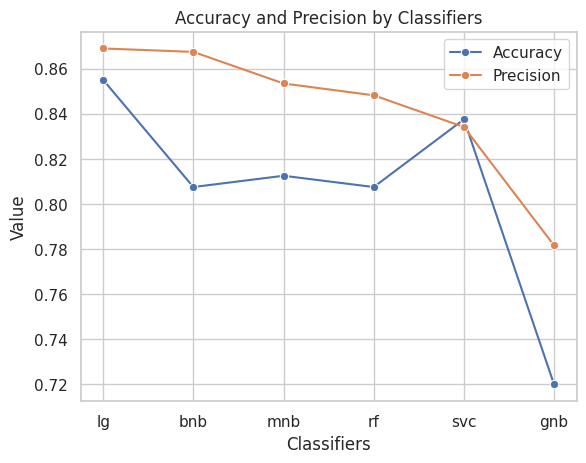

In [37]:
sns.set(style="whitegrid")
sns.lineplot(x=perf_df.classifiers, y=perf_df.accuracy, marker='o', label='Accuracy', data=perf_df)
sns.lineplot(x=perf_df.classifiers, y=perf_df.precision, marker='o', label='Precision', data=perf_df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()